# Training Materials: Creating Slope from DEM

This notebook provides training on creating slope maps from Digital Elevation Models (DEMs) using Python and Rasterio.

## I. Introduction

* **What is a DEM?**
 A DEM is a digital representation of a terrain's elevation. It's typically a raster grid where each cell contains the elevation value for that location.
* **What is slope?**
 Slope is the rate of change of elevation over a distance. It's crucial in various fields like hydrology and geomorphology.
* **Why derive slope from DEM?**
 Slope is derived from DEMs to understand terrain characteristics, which are essential for many applications.
* **Software and Libraries:**
 We'll use Rasterio for raster data handling, NumPy for numerical computations, and Matplotlib for visualization.

## II. Setting up the Environment

In [1]:
!pip install rasterio numpy matplotlib

* `rasterio`:  For reading and writing geospatial raster data.
* `numpy`: For numerical operations on arrays.
* `matplotlib`: For creating visualizations.

## III. Loading and Visualizing the DEM

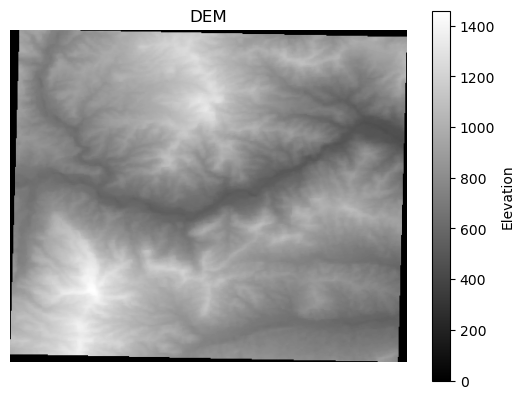

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 473, 'height': 396, 'count': 1, 'crs': CRS.from_wkt('PROJCS["NAD83(MA11) / UTM zone 54N",GEOGCS["NAD83(MA11)",DATUM["NAD83_National_Spatial_Reference_System_MA11",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1118"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6325"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",141],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","8692"]]'), 'transform': Affine(25.62021099365758, 0.0, 286513.7115,
       0.0, -30.217075505051668, 4053099.1213), 'blockxsize': 473, 'blockysize': 8, 'tiled': False, 'interleave': 'band'}
| 25.62, 0.00, 286513.71|
| 0.00,-30.22, 4053099.12|
| 0

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Replace with your DEM file path
dem_path = '/home/jovyan/shared/Arissara/ALOS-2/Yamba/Finalize/Clip_ASTGTMV003_N36E138_dem.tif'

with rasterio.open(dem_path) as dem_src:
    dem = dem_src.read(1)
    profile = dem_src.profile
    transform = dem_src.transform

plt.imshow(dem, cmap='gray')
plt.title('DEM')
plt.colorbar(label='Elevation')
plt.axis('off')
plt.show()

print(profile)
print(transform)

## IV. Calculating Slope

In [3]:
# Calculate the pixel size from the DEM's transform
# transform[0] gives the pixel width (x resolution)
# transform[4] gives the pixel height (y resolution, typically negative)
pixel_size_x = transform[0]
pixel_size_y = -transform[4]  # Negative as it’s typically negative in a geotransform

# Compute the slope using numpy gradient (which calculates the first derivative)
dem = np.nan_to_num(dem)  # Handling NaN values if any
gradient_y, gradient_x = np.gradient(dem, pixel_size_y, pixel_size_x)

# Calculate the slope in degrees
slope = np.arctan(np.sqrt(gradient_x**2 + gradient_y**2)) * (180 / np.pi)

## V. Visualizing the Slope Map

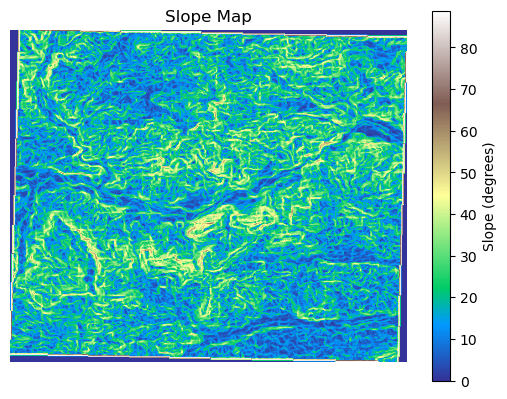

In [4]:
plt.imshow(slope, cmap='terrain')
plt.title('Slope Map')
plt.colorbar(label='Slope (degrees)')
plt.axis('off')
plt.show()

## VI. Exporting the Slope Map

In [5]:
output_slope_path = '/home/jovyan/shared/genAI/slope.tif'

profile.update(dtype=rasterio.float32, count=1)

with rasterio.open(output_slope_path, 'w', **profile) as dst:
    dst.write(slope.astype(rasterio.float32), 1)